In [1]:
#import numpy library
import numpy as np

### Lasso Regression

In [2]:
class lasso_regression():
    
    #initiating the hyperparameters
    def __init__(self,learning_rate,no_of_iterations,lambda_parameter):
        self.learning_rate = learning_rate
        self.no_of_iterations = no_of_iterations
        self.lambda_parameter = lambda_parameter
        
    #fitting the dataset to the Lasso Regression Model
    def fit(self,X,Y):
        
        #'m'-->no.of datapoints in dataset -->no.rows
        #'n'--> no.of features in dataset-->no.columns
        
        self.m,self.n = X.shape
        
        self.w = np.zeros(self.n)
        self.b = 0
        self.X = X
        self.Y = Y
        
        #implemention Gradient Descent Algorithm for optimization
        for i in range(no_of_iterations):
            self.update_weights()
  
    #function for updating the weight and bias value 
    def update_weights(self):
      
    
        #Linear equation of the model
        Y_prediction = self.predict(self.X)
        
        #finding the gradients(dw, db)
        
        #gradients for weight
        dw = np.zeros(self.n)
        
        for i in range(self.n):
            
            if self.w[i]>0:
                
                dw[i] = (-(2*(self.X[:,i]).dot(self.Y - Y_prediction)) + self.lambda_parameter) /self.m
                
            else:
                
                dw[i] = (-(2*(self.X[:,i]).dot(self.Y - Y_prediction)) - self.lambda_parameter) /self.m
                
                
        #gradient for bias
        db = -2 * np.sum(self.Y - Y_prediction)/self.m
                
        
        #updating the weight & bias
        self.w = self.w - self.learning_rate * dw
        self.b = self.b - self.learning_rate * db
    
    #Predicting the target variable
    def predict(self,X):
        
        return X.dot(self.w) + self.b
        

In [6]:
#importing dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

### Data Collection & PreProcessing

In [7]:
# loading dataset from csv file to pandas dataframe
car_dataset = pd.read_csv(r"C:\Users\bharathi.v04\Downloads\DS\car data.csv")

In [9]:
#inspecting the first 5 rows of the dataframe
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [10]:
#checking the number of rows and columns
car_dataset.shape

(301, 9)

In [11]:
# getting some information about dataset
car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [12]:
#checking the number of missing values
car_dataset.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [14]:
#checking the distribution of categorical data
print(car_dataset['Fuel_Type'].value_counts())
print(car_dataset['Seller_Type'].value_counts())
print(car_dataset['Transmission'].value_counts())

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64
Dealer        195
Individual    106
Name: Seller_Type, dtype: int64
Manual       261
Automatic     40
Name: Transmission, dtype: int64


### Encoding the Categorical Data

In [15]:
#encoding "Fuel" type column
car_dataset.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)


car_dataset.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace=True)                    
                     

car_dataset.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)



In [16]:
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


### Splitting the data & target

In [17]:
X =car_dataset.drop(['Selling_Price','Car_Name'],axis=1)
Y =car_dataset['Selling_Price']

In [18]:
print(X)

     Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  \
0    2014           5.59       27000          0            0             0   
1    2013           9.54       43000          1            0             0   
2    2017           9.85        6900          0            0             0   
3    2011           4.15        5200          0            0             0   
4    2014           6.87       42450          1            0             0   
..    ...            ...         ...        ...          ...           ...   
296  2016          11.60       33988          1            0             0   
297  2015           5.90       60000          0            0             0   
298  2009          11.00       87934          0            0             0   
299  2017          12.50        9000          1            0             0   
300  2016           5.90        5464          0            0             0   

     Owner  
0        0  
1        0  
2        0  
3        0 

In [19]:
print(Y)

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64


### Spliting training & test data

In [21]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.1,random_state=2)

## Model Training

### Linear Regression

In [22]:
#loading linear regression model
lin_reg_model = LinearRegression()

In [23]:
lin_reg_model.fit(X_train,Y_train)

LinearRegression()

#### Model Evaluation

In [24]:
# Prediction on training data
training_data_prediction = lin_reg_model.predict(X_train)

In [25]:
# R squared error
error_score = metrics.r2_score(Y_train,training_data_prediction)
print("R squared error is : ",error_score)

R squared error is :  0.8799451660493698


#### Visualize actual prices and predicted prices

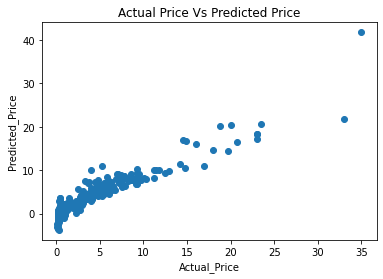

In [26]:
plt.scatter(Y_train,training_data_prediction)
plt.xlabel("Actual_Price")
plt.ylabel("Predicted_Price")
plt.title("Actual Price Vs Predicted Price")
plt.show()

In [27]:
# Prediction on test data
test_data_prediction = lin_reg_model.predict(X_test)

In [28]:
# R squared error
error_score = metrics.r2_score(Y_test,test_data_prediction)
print("R squared error is : ",error_score)

R squared error is :  0.8365766715026905


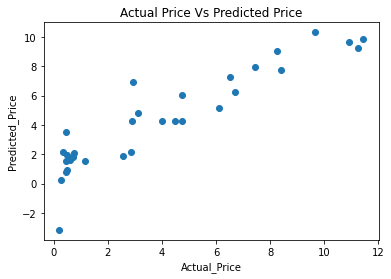

In [29]:
plt.scatter(Y_test,test_data_prediction)
plt.xlabel("Actual_Price")
plt.ylabel("Predicted_Price")
plt.title("Actual Price Vs Predicted Price")
plt.show()

### Lasso Regression

In [30]:
lass_reg_model = Lasso()

In [31]:
lass_reg_model.fit(X_train,Y_train)

Lasso()

#### Model Evaluation

In [32]:
# Prediction on training data
training_data_prediction = lass_reg_model.predict(X_train)

In [33]:
# R squared error
error_score = metrics.r2_score(Y_train,training_data_prediction)
print("R squared error is : ",error_score)

R squared error is :  0.8427856123435794


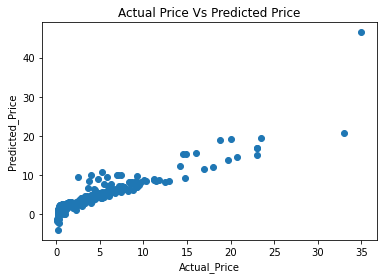

In [34]:
plt.scatter(Y_train,training_data_prediction)
plt.xlabel("Actual_Price")
plt.ylabel("Predicted_Price")
plt.title("Actual Price Vs Predicted Price")
plt.show()

In [35]:
# Prediction on test data
test_data_prediction = lass_reg_model.predict(X_test)

In [36]:
# R squared error
error_score = metrics.r2_score(Y_test,test_data_prediction)
print("R squared error is : ",error_score)

R squared error is :  0.8709167941173195


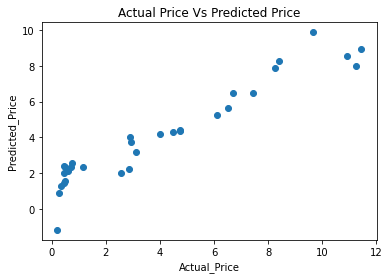

In [37]:
plt.scatter(Y_test,test_data_prediction)
plt.xlabel("Actual_Price")
plt.ylabel("Predicted_Price")
plt.title("Actual Price Vs Predicted Price")
plt.show()